## Convergence en loi

### Apériodique/périodique

> ***Définition:*** Considérons un graphe irréductible orienté. Il est périodique, de période $n>1$, lorsque toutes les boucles qu'on peut faire en suivant les arêtes ont une longueur multiple de $n$.

Remarques:

* Grâce à l'irréductibilité, il suffit de tester les boucles issues d'un état donné.

* Pour montrer qu'un graphe est apériodique, il suffit de trouver un état $x_0$ et de trouver deux boucles issues de $x_0$ dont le pcgd des longueurs est 1.


### Théorème de la convergence en loi


> ***Théorème (convergence en loi):*** Considérons une chaine de Markov irréductible apériodique. Alors $(X_t)$ converge en loi vers  l'unique probabilité invariante.


Il y a une histoire de point fixe derrière ce théorème: en notant $\mu_t$ la loi de $X_t$, on a $\mu_{t+1}= \mu_t P$ ; donc si $\mu_t$ converge, il converge nécessairement vers un $\pi$ vérifiant $\pi=\pi P$.




### Traduction sur les puissances de $P$






"Convergence en loi" est un gros mot pour des probas discrètes: Cela indique simplement que pour tout $y$:
$$
\mathbf P (X_t = y) \rightarrow \pi(y)
$$
Mais notons que c'est vrai quelle que soit la probabilité initiale en particulier quand la chaine part d'un point précis:
$$
\mathbf P (X_t = y / X=x) \rightarrow \pi(y)
$$
Ce qui se traduit par
$$
 P^t (x,y) \rightarrow \pi(y)
$$
Il faut bien remarque que la limite ne dépend pas de $x$: toutes les lignes de $P^t$ convergent vers la même limite.





### Un cas au hasard

On prend une matrice de transition au hasard:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n=7
P=np.random.rand(n,n)
P/=np.sum(P,axis=1,keepdims=True)
P

array([[0.01339553, 0.22281679, 0.17290229, 0.15398002, 0.15932239,
        0.13834398, 0.139239  ],
       [0.18869324, 0.29254782, 0.1484052 , 0.0057449 , 0.05394744,
        0.01535477, 0.29530662],
       [0.16236685, 0.06429957, 0.17961344, 0.21543347, 0.00083847,
        0.1377082 , 0.23974001],
       [0.25727554, 0.20713929, 0.2209624 , 0.05266088, 0.06188421,
        0.15358646, 0.04649122],
       [0.03732067, 0.27158763, 0.21325292, 0.03316413, 0.28754294,
        0.14059088, 0.01654083],
       [0.18422951, 0.1954918 , 0.08871072, 0.16517429, 0.08394687,
        0.06713469, 0.21531212],
       [0.09289692, 0.26986052, 0.05547652, 0.10680773, 0.22656741,
        0.18506723, 0.06332368]])

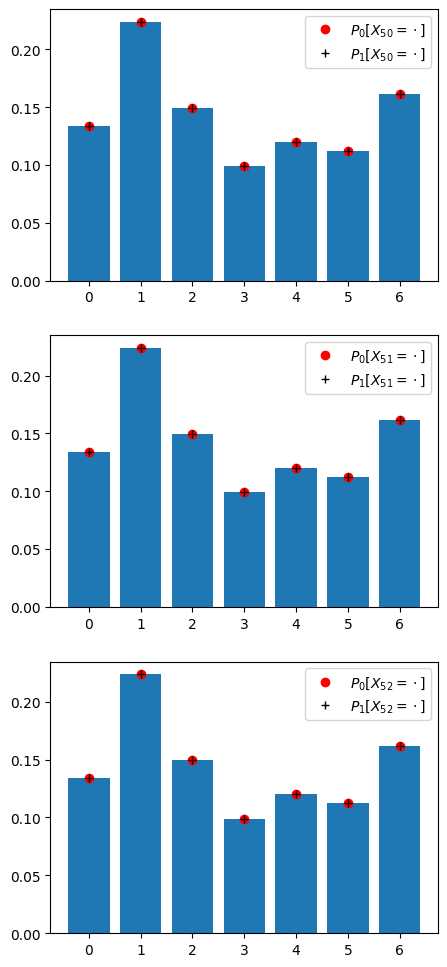

In [3]:
def mesure_invariante(P):
    val_pr,vec_pr=np.linalg.eig(P.T)
    val_pr=np.real(val_pr)
    vec_pr=np.real(vec_pr)
    pi=vec_pr[:,0]
    pi/=np.sum(pi)
    return pi


def three_times_two_starting_points(P):

    pi=mesure_invariante(P)

    fig, ax = plt.subplots(3, 1, figsize=(5,12))
    fig.subplots_adjust(hspace=0.2)


    def one_Pt(t,ax):
        P_t=np.linalg.matrix_power(P,t)
        ax.bar(range(len(pi)),pi)
        ax.plot(P_t[0,:],"o",c="red",label=rf"$P_0[X_{{{t}}}=\cdot]$")
        ax.plot(P_t[1,:],"+",c="k",label=rf"$P_1[X_{{{t}}}=\cdot]$")
        ax.legend()

    one_Pt(50,ax[0])
    one_Pt(51,ax[1])
    one_Pt(52,ax[2])

three_times_two_starting_points(P)

On voit qu'au temps 50, 51, 52 la chaine de Markov a la même loi. Et ceci qu'elle soit partie de l'état 0 ou de l'état 1.

### Cas périodique


#### ♡♡

Le cas périodique le plus simple est celui de deux états, chacun menant à l'autre avec proba 1.



La matrice de transition est donc:
$$
P = \color{red}{\begin{pmatrix}0&1\\ 1&0 \end{pmatrix}},
$$
On a
$$
P^2 = \color{red}{I},
$$
et donc
$$
P^t
=
\left\{
\begin{array}{ll}
\color{red}{P} &\text{si t est impair} \\
\color{red}{I} & \text{sinon}
\end{array}
\right.
$$
On voit ainsi que la convergence en loi ne peut avoir lieu.

De manière générale, si on a une chaine $k$-périodique, on peut considérer $k$-chaines de Markov distinctes, dont les matrices de transitions sont $P^k,P^{k+1}, ..., P^{k+k-1}$. Elles ont chacune leur espace d'états disjoints.

### Cas apériodique mais...

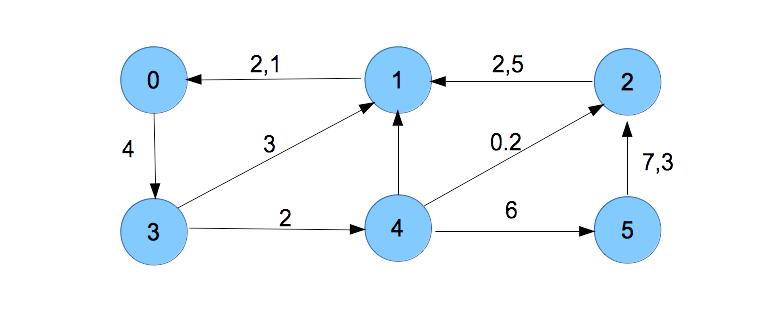

In [4]:
"renvoie la matrice de transition associée au dessin précédent."
def premiere_chaine():

    P=np.zeros([6,6])
    P[0,3]=4
    P[1,0]=2.1
    P[2,1]=2.5
    P[3,1]=3
    P[3,4]=2
    P[4,1]=2
    P[4,2]=0.2
    P[4,5]=6
    P[5,2]=7.3

    sumLine=np.sum(P,axis=1)
    P/=sumLine[:,np.newaxis]

    return P

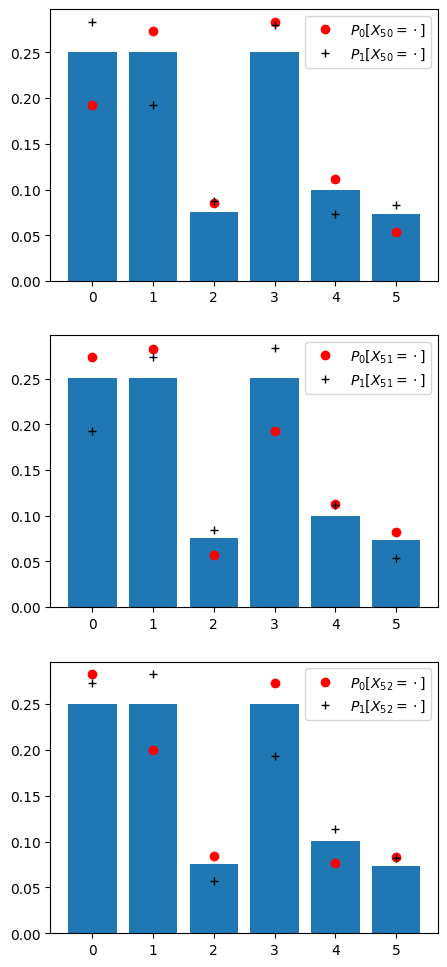

In [5]:
P=premiere_chaine()

three_times_two_starting_points(P)

Explication: Il faut remarquer qu'en partant de l'état 1, on va forcément à l'état 0 à l'instant suivant. Donc la probabilité de tomber en 0 à l'instant $t+1$ est exactement la probabilité de tomber en 1 à l'instant $t$. Par conséquent, d'un instant au suivant, les points de la barre 1 se "déplacent" sur la barre 0.

En partant de 0 à l'instant initial (points rouges), la probabilité d'être en 0 à l'instant 50 est plutôt élevée, mais celle d'être en 1 assez faible. Ainsi, à l'instant 51, la probabilité de tomber en 0 est assez faible.

En partant de 1 à l'instant initial (points rouges), c'est l'inverse.

En fait, cette chaîne a un petit côté périodique, dans la mesure où on a un cycle $5 \to 2 \to 1 \to 0 \to 3 \to 4 \to 5$, qui ne peut être interrompu que par trois "raccourcis" : $3 \to 1$, $4 \to 1$ et $4 \to 2$. Ce sont ces trois raccourcis qui font de cette chaîne une chaîne apériodique et permettent sa convergence en loi, mais à $t=50$ les raccourcis n'ont pas encore bien mélangé les probabilités.

## Réversibilité












### Définition

Soit $\pi$ une mesure sur l'espace d'état. Soit $P$ la matrice de transition d'une chaine de Markov.

> ***Définition:*** On dit que $P$ est $\pi$-réversible quand
$$
\pi(x)P(x,y) = \pi(y)P(y,x)
$$
En particulier  1-réversible est synonyme de  symétrique.

> ***Proposition:*** Si $P$ est $\pi$-réversible alors $\pi$ est une mesure invariante pour $P$.





#### ♡♡


*Démonstration:*
$$
\pi P(y) =\color{red}{\pi(y)\sum_xP(y,x)} = \pi(y)
$$


### Graph non orienté


Une matrice de transiton $P$ peut être associée à un graph orienté pondéré:
On met le poids $P(x,y)\geq 0$ sur l'arête allant de $x$ à $y$; et on efface les arêtes de poids $0$.  


Réciproquement: Considérons un graphe orienté pondéré: notons $w_{xy}>0$ le poids de l'arête allant de $x$ à $y$. On lui associe alors la matrice de transition $P$ par la formule:
$$
P(x,y)= {w_{xy}\over  \sum_u w(x,u) }.
$$
Nous appelons "weight-to-matrix" la formule ci-dessus.



> ***Proposition:*** Considérons un graph non orienté pondéré. Notons $w_{xy} = w_{yx}$ le poids de l'arête entre $x$ et $y$. Notons $m(x)=\sum_u P(x,u)$. La matrice $P$ construite par la formule weight-to-matrix est $m$-réversible.







#### ♡


*Démonstration:*
$$
m_x P(x,y) =\color{red}{\square \square \square}
$$

A tous graphe non orienté on peux associer une matrice réversible. Et on peut faire l'association inverse:


 Considérons une matrice de transiton $P$ qui est $\pi$-réversible. Posons
$$
w_{xy} =  \pi(x)P(x,y) = \pi(y)P(y,x) = w_{yx}
$$
On construit le graphe non-orienté dont l'arête reliant $x$ à $y$ a le poids $w_{xy}$.


>***Proposition:*** En appliquant la formule weight-to-matrix au graphe de l'on vient de construire, on retombe sur $P$.






#### ♡


*Démonstration:* On a $\sum_u w(x,u) = \color{red}{\square \square \square}$. Donc
$$
{w_{xy}\over  \sum_u P(x,u) } = P(x,y)
$$
$\square$

### Metropolis, l'algo

Ceci est un résumé du TP sur les configuration acceptable.



On considère une grille de taille $size\times size$. Une configuration de particules $C$ est un élément $\{0,1\}^{size\times size}$: Pour chaque site $i,j$: $C_{i,j}=1$ indique qu'il y a une particule en $i,j$ et $C_{i,j}=0$ indique qu'il n'y en a pas.


Considérons  $\mathcal C$  un ensemble de particules. Les configurations de $\mathcal C$ seront dites acceptables.



L'algorithme de Hasting-Metropolis permet d'obtenir asymtotiquement une configuration aléatoire $C$, de loi
uniforme sur $\mathcal C$.


Voici son fonctionnemment:


* On construit une suite $(C_t)$.


* On initialise $C_0$ avec une configuration acceptable donnée.

* On suppose par récurrence que la configuration $C_t$ qu'on a obtenu à l'instant $t$ est acceptable.

À l'étape $t+1$:

* On tire un site $i,j$ aléatoirement (c'est le tirage préliminaire).


* On modifie $C_t$ uniquement en $i,j$: s'il y avait une particule on la retire, s'il n'y en avait pas on l'ajoute. Notons $\hat C_{t+1}$ la configuration ainsi modifiée.

* Si $\hat C_{t+1}$ est acceptable alors on pose $C_{t+1} = \hat C_{t+1}$

* Sinon on pose $C_{t+1} = C_t$.


### Metropolis, le théorème



> ***Théorème:*** Supposons qu'avec l'algorithme précédent on puisse, en partant de $C_0$, aller vers n'importe quelle configuration de $\mathcal C$, alors la  $(C_t)$ converge en loi vers la loi uniforme sur $\mathcal C$.


*Démonstrantion:* Notons que  par construction, notre chaine de Markov $(C_t)$ démarre en $\mathcal C$ et ne peut en sortir. De plus, l'état initial mêne à tous les élément de $\mathcal C$. On voit aussi que la chaine de Markov peut toujours revenir en arrière (il suffit de faire 2 fois le même tirage préliminaire). Ainsi elle est irréductible et son espace d'état est $\mathcal C$.

La chaine peut aussi faire du sur-place (quand le tirage préliminaire conduit à une configuration non-acceptable). La chaine est donc apériodique. Elle converge donc en loi vers l'unique proba invariante.


Pour montrer que cette probabilité invariante est uniforme, on va montrer que la probabilité de transition est 1-réversible. Il faut donc montrer:
$$
\forall x,y \in \mathcal C \qquad P(x,y) = P(y,x)
$$
Prenons $x,y$ dans $\mathcal C$.


* Si $x=y$ alors naturellement $P(x,y) = P(y,x)=P(x,x)$. Notons que cette proba est complexe à calculer: c'est la proba de rejeter le changement. Elle dépend de fortement de $x$.



* Si $x\neq y$  et si $x$ et $y$ on le même nombre de particules alors $P(x,y) = P(y,x)=0$.



* Si $x$ et $y$ diffère de 2 particules ou plus alors $P(x,y) = P(y,x)=0$.

* Si $x$ et $y$ diffère exactement d'une particule.  Notons $i,j$ le site de cette particule supplémentaire. La proba de passer de $x$ à $y$ c'est simplement la proba de tomber sur $i,j$ lors du tirage préliminaire.  Tandis que la proba de passer de $y$ à $x$ c'est aussi la proba de tomber sur $i,j$ lors du tirage préliminaire. Ainsi
$$
P(x,y) = P(y,x)={1 \over size^2}
$$
$\square$

#### ♡♡

Dans l'algo il est écrit: On tire un site $i,j$ aléatoirement. Est-il nécéssaire que ce tirage soit uniforme sur tous les sites? Justifiez.

